<center>
    <p>
        <img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="150">
    </p>
    <h1>Ingenieria de Caracteristicas</h1>
    <h3>Proyecto Final: Responsabilidad vehicular y el impacto del alchol en accidentes en Sonora </h3>
    <p> Alumno : Ariel David López Cota</p>
    <p> Profesor : Dr. Julio Waissman</p>

</center>

In [1]:
# 1 - Imports - Libreries necessary
import requests
import os
import platform
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import zipfile
import seaborn as sns

In [2]:
# 2 - DWONLOAD FILES - Creation of folders and download file necessary

# Creation of a folder to contain all the files downloaded.
# Note WINDOWS USERS: For Windows users you must change the "/" to "\" for path directories
if(platform.system() == "Windows"):
    #!mkdir Data_Lab
    !mkdir Data_Lab\Accidentes_INEGI
    # !mkdir Data_Lab\Reg_Vehiculos_INEGI
    !mkdir Data_Lab\Censos
else:
    !mkdir Data_Lab
    !mkdir -p Data_Lab/Accidentes_INEGI
    !mkdir -p Data_Lab/Reg_Vehiculos_INEGI

# URL of the files, it is a zip file from INEGI (https://www.inegi.org.mx/programas/accidentes/#Datos_abiertos)
# It is a zip file conating multiple file (Catalog of Data, Diccionario y csv data of the accidents by year from 1997 -> 2021)
urlString_Accidentes = "https://www.inegi.org.mx/contenidos/programas/accidentes/datosabiertos/atus_anual_csv.zip"
urlString_Censo2000 = "https://www.inegi.org.mx/contenidos/programas/ccpv/2000/datosabiertos/cgpv2000_iter_26_csv.zip"
urlString_Censo2010 = "https://www.inegi.org.mx/contenidos/programas/ccpv/2010/datosabiertos/iter_26_2010_csv.zip"
urlString_Censo2020 = "https://www.inegi.org.mx/contenidos/programas/ccpv/2020/datosabiertos/iter/iter_26_cpv2020_csv.zip"

# Folders and Zip files
folder_main = os.getcwd()
folder_DataLab = os.path.join(folder_main, "Data_Lab")
file_Accidentes = os.path.join(folder_DataLab, "Accidentes_INEGI.zip")
file_Censo2000 = os.path.join(folder_DataLab, "Censo2000.zip")
file_Censo2010 = os.path.join(folder_DataLab, "Censo2010.zip")
file_Censo2020 = os.path.join(folder_DataLab, "Censo2020.zip")
# file_Registro = os.path.join(folder_DataLab, "Accidentes_INEGI.zip")

folder_Accidentes = os.path.join(folder_DataLab, "Accidentes_INEGI")
folder_Censos= os.path.join(folder_DataLab, "Censos")
# folder_Registri = os.path.join(folder_DataLab, "Reg_Vehiculos_INEGI")

# 2.1 - Dowload 2 zip files (Accidents and Vehicles Register)
if(os.path.exists(file_Accidentes) == False):
    r = requests.get(urlString_Accidentes, stream = True)
    pathZipFile = os.path.join(folder_DataLab, "Accidentes_INEGI.zip")
    # Dowload file and store it on "Data_Lab" (Folder created)
    with open(pathZipFile, "wb") as file: 
        for block in r.iter_content(chunk_size = 1024):
            if block: 
             file.write(block) 
    # Extract the file 
    with zipfile.ZipFile(file_Accidentes, 'r') as zip_ref:
        zip_ref.extractall(folder_Accidentes)

# Censo 2000
if(os.path.exists(file_Censo2000) == False):
    r = requests.get(urlString_Censo2000, stream = True)
    pathZipFile = os.path.join(folder_DataLab, "Censo2000.zip")
    # Dowload file and store it on "Data_Lab" (Folder created)
    with open(pathZipFile, "wb") as file: 
        for block in r.iter_content(chunk_size = 1024):
            if block: 
             file.write(block) 
    # Extract the file 
    with zipfile.ZipFile(file_Censo2000, 'r') as zip_ref:
        zip_ref.extractall(folder_Censos)

# Censo 2010
if(os.path.exists(file_Censo2010) == False):
    r = requests.get(urlString_Censo2010, stream = True)
    pathZipFile = os.path.join(folder_DataLab, "Censo2010.zip")
    # Dowload file and store it on "Data_Lab" (Folder created)
    with open(pathZipFile, "wb") as file: 
        for block in r.iter_content(chunk_size = 1024):
            if block: 
             file.write(block) 
    # Extract the file 
    with zipfile.ZipFile(file_Censo2010, 'r') as zip_ref:
        zip_ref.extractall(folder_Censos)

# Censo 2020    
if(os.path.exists(file_Censo2020) == False):
    r = requests.get(urlString_Censo2020, stream = True)
    pathZipFile = os.path.join(folder_DataLab, "Censo2020.zip")
    # Dowload file and store it on "Data_Lab" (Folder created)
    with open(pathZipFile, "wb") as file: 
        for block in r.iter_content(chunk_size = 1024):
            if block: 
             file.write(block) 
    # Extract the file 
    with zipfile.ZipFile(file_Censo2020, 'r') as zip_ref:
        zip_ref.extractall(folder_Censos)


A subdirectory or file Data_Lab\Accidentes_INEGI already exists.
A subdirectory or file Data_Lab\Censos already exists.


In [41]:
#3 - 1 SINGLE FILE - Creates a single DataFrame for all the files

folder_DataLab = os.path.join(folder_main, "Data_Lab")
path_Files_Accidentes = os.path.join(folder_DataLab,"Accidentes_INEGI", "conjunto_de_datos")

# 3.1 Get all files names on the folder
list_files = os.listdir(path_Files_Accidentes)
df_Complete = pd.DataFrame

# Just a variable to know if is the first file to read
isFirst_CSV = True
# 3.2 - loop from all files and add each csv to a single dataframe1
for xFile in list_files:
  pathCSV = os.path.join(path_Files_Accidentes, xFile)
  # Index_col = false due it has a delimiter at the end of each line ex: vlaue1,valueLast,
  df_temp =  pd.read_csv(pathCSV, index_col = False)
  if (isFirst_CSV):
    df_Complete = df_temp
    isFirst_CSV = False
  else:
    df_Complete = pd.concat([df_Complete, df_temp], ignore_index=True)

df_Complete

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,1997,1,20,0,7,Martes,Accidente en no intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
1,Municipal,1,1,1997,1,20,0,19,Domingo,Accidente en intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Revisadas
2,Municipal,1,1,1997,1,20,0,20,Lunes,Accidente en no intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
3,Municipal,1,1,1997,1,20,5,22,Miércoles,Accidente en no intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Revisadas
4,Municipal,1,1,1997,1,20,15,25,Sábado,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550879,Municipal,32,56,2021,12,15,0,26,Domingo,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
9550880,Municipal,32,56,2021,12,17,30,26,Domingo,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
9550881,Municipal,32,56,2021,12,16,58,29,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
9550882,Municipal,32,56,2021,12,20,17,29,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


In [3]:
# 4 - GET CITIES NAMES 
# Catalog paths : There CSV files that has the names of the cities by ID

pathCSV_Catalogo_Municipios = os.path.join(folder_Accidentes, "catalogos", "tc_municipio.csv")
pathCSV_Catalogo_Entidades = os.path.join(folder_Accidentes, "catalogos", "tc_entidad.csv")

df_Catalogo_Municipio = pd.read_csv(pathCSV_Catalogo_Municipios, index_col = False)
df_Catalogo_Entidad = pd.read_csv(pathCSV_Catalogo_Entidades, index_col = False)

# Get only "MUNICIPIOS" from Sonora
df_Catalogo_Municipio = df_Catalogo_Municipio[df_Catalogo_Municipio["ID_ENTIDAD"] == 26]

In [ ]:
# 5 - DATAFRAME SONORA

# 5.1 - Funtion to create column All_Deaths = Sum (All_Deaths by accident)
def Total_Muertos(fila):
  result = fila["CONDMUERTO"] + fila["PASAMUERTO"] + fila["PEATMUERTO"] + fila["CICLMUERTO"] + fila["OTROMUERTO"]
  return result

# 5.2 - Function to create column All_Injuries by accident
def Total_Heridos(fila):
  result = fila["CONDHERIDO"] + fila["PASAHERIDO"] + fila["PEATHERIDO"] + fila["CICLHERIDO"] + fila["OTROHERIDO"]
  return result

# 5.3 Function to Add Munucipio Name 
def Name_Municipio(fila):
  result = df_Catalogo_Municipio[df_Catalogo_Municipio["ID_MUNICIPIO"] == fila.ID_MUNICIPIO ]
  result = result.iloc[0]['NOM_MUNICIPIO']
  return result

def Name_Municipio2(fila):
  result = df_Catalogo_Municipio[df_Catalogo_Municipio["ID_MUNICIPIO"] == fila.name ]
  result = result.iloc[0]['NOM_MUNICIPIO']
  return result

def Name_Entidad(fila):
  result = df_Catalogo_Entidad[df_Catalogo_Entidad["ID_ENTIDAD"] == fila.name ]
  result = result.iloc[0]['NOM_ENTIDAD']
  return result

# Create a DateTime column
def Create_DateTime(fila):
  if len(str(fila["MES"])) == 1:
    result = str(fila["ANIO"]) + "-" + "0" + str(fila["MES"]) + "-" + str(fila["ID_DIA"]) + " " + str(fila["ID_HORA"]) + ":" + str(fila["ID_MINUTO"]) + ":00"
  else:
    result = str(fila["ANIO"]) + "-" + str(fila["MES"]) + "-" + str(fila["ID_DIA"]) + " " + str(fila["ID_HORA"]) + ":" + str(fila["ID_MINUTO"]) + ":00"
  return result


# 5.1 Create data frame only for Sonora
df_Sonora = df_Complete[df_Complete["ID_ENTIDAD"] == 26]

# 5.2 & 5.3 - Get total DEATHS and INJURIES
df_Sonora["Total_Muertos"] = df_Sonora.apply(Total_Muertos, axis=1)
df_Sonora["Total_Heridos"] = df_Sonora.apply(Total_Heridos, axis=1)
df_Sonora["Fecha"] = df_Sonora.apply(Create_DateTime, axis=1)
df_Sonora["Municipio_Nombre"] = df_Sonora.apply(Name_Municipio, axis=1)
df_Sonora['Fecha_Formated'] = pd.to_datetime(df_Sonora['Fecha'], format="%Y-%m-%d %H:%M:%S", errors="coerce")

# Clean colum DIASEMANA Column "DIASEMANA" hava same day but lowercase, uppercase or accent
df_Sonora.loc[df_Sonora["DIASEMANA"] == "lunes", "DIASEMANA"] = "Lunes"
df_Sonora.loc[df_Sonora["DIASEMANA"] == "Miercoles", "DIASEMANA"] = "Miércoles"
df_Sonora.loc[df_Sonora["DIASEMANA"] == "Sabado", "DIASEMANA"] = "Sábado"
df_Sonora["Municipio_Nombre"] = df_Sonora.apply(Name_Municipio, axis=1)
df_Sonora = df_Sonora.fillna(0)

df_Sonora_Complete = df_Sonora.copy()

In [ ]:
# Delete columns no needed
# # Drop columns which I considere not useful (On value for all rows, not interest)
# df_Complete.drop(["COBERTURA", "CLASACC", "ESTATUS","ID_ENTIDAD","ID_MINUTO",'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS', 'PASCAMION', 'OMNIBUS', 'TRANVIA',
#        'CAMIONETA', 'CAMION', 'TRACTOR', 'FERROCARRI', 'MOTOCICLET',
#        'BICICLETA', 'OTROVEHIC',], axis=1, inplace = True)
df_Sonora.drop(["COBERTURA", "CLASACC", "ESTATUS","ID_ENTIDAD","ID_MINUTO",'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS', 'PASCAMION', 'OMNIBUS', 'TRANVIA',
       'CAMIONETA', 'CAMION', 'TRACTOR', 'FERROCARRI', 'MOTOCICLET',
       'BICICLETA', 'OTROVEHIC',"Fecha"], axis=1, inplace = True)

# df_Sonora = df_Sonora.fillna(0)
df_Sonora.columns

In [48]:
file_Sonora_csv = os.path.join(folder_DataLab, "Accidentes_Sonora_1997_2021.csv")
df_Sonora.to_csv(file_Sonora_csv)
# df_Sonora = pd.read_csv(file_Sonora_csv, index_col=0)

## Censos de poblacion
Obtendremmos los censos de poblacion para colocar la poblacion a cada municipio en su respectivo año.

In [5]:
# Censos de poblacion
file_poblacion_2000_csv = os.path.join(folder_DataLab, "Censos", "cgpv2000_iter_26", "Conjunto_de_datos", "cgpv2000_iter_26.csv")
file_poblacion_2010_csv = os.path.join(folder_DataLab, "Censos", "iter_26_cpv2010", "Conjunto_de_datos", "iter_26_cpv2010.csv")
file_poblacion_2020_csv = os.path.join(folder_DataLab, "Censos", "iter_26_cpv2020", "Conjunto_de_datos", "conjunto_de_datos_iter_26CSV20.csv")

df_Poblacion_2000_completed = pd.read_csv(file_poblacion_2000_csv, index_col=False)
df_Poblacion_2010_completed = pd.read_csv(file_poblacion_2010_csv, index_col=False)
df_Poblacion_2020_completed = pd.read_csv(file_poblacion_2020_csv, index_col=False)
df_Poblacion_2000 = df_Poblacion_2000_completed[df_Poblacion_2000_completed["nom_loc"] == "TOTAL MUNICIPAL"]
df_Poblacion_2010 = df_Poblacion_2010_completed[df_Poblacion_2010_completed["nom_loc"] == "Total del Municipio"]
df_Poblacion_2020 = df_Poblacion_2020_completed[df_Poblacion_2020_completed["NOM_LOC"] == "Total del Municipio"]


#### Creación de nuestro dataframe con los valores totales, de cada municipio y su tasas (accidentes, alchol, muertos, heridos, fugas)

In [10]:

listYears = df_Sonora.ANIO.unique()
listMunicipio = df_Sonora["ID_MUNICIPIO"].unique()
listYears.sort()
listMunicipio.sort()

list_DeathTotal = []
list_DeathDrunk = []
list_InjuryTotal = []
list_InjuryDrunk = []
list_poblacion = []
list_nombre = []

list_Total_Acc = []
list_Total_Cinturon = []
list_Cinturon_Tasa = []
list_Total_Fugas = []
list_Fugas_Tasa = []

list_Year = []
list_Municipio = []
# Adding names and poblation
list_nombres = []
list_poblacion = []

# Get Tasa
list_Tasa_Deaths = []
list_Tasa_Injury = []
list_Tasa_Deaths_Alcohol = []
list_Tasa_Injury_Alcohol = []
list_Acc_Tasa = []

# Agregar Total_Accidentes, Total_Cinturon_Uso, Tasa_Cinturon_Uso, Total_Fugas, Tasa_Fuga

for year in listYears:
    for mun in listMunicipio:
        totalDeath_year = sum(df_Sonora[(df_Sonora["ID_MUNICIPIO"] == mun) & (df_Sonora["ANIO"] == year)].Total_Muertos)
        totalDeath_Drunk_year = sum(df_Sonora[(df_Sonora["ID_MUNICIPIO"] == mun) & (df_Sonora["ANIO"] == year) & (df_Sonora["ALIENTO"] == "Sí")].Total_Muertos)
        totalInjury = sum(df_Sonora[(df_Sonora["ID_MUNICIPIO"] == mun) & (df_Sonora["ANIO"] == year)].Total_Heridos)
        totalInjury_Drunk_year = sum(df_Sonora[(df_Sonora["ID_MUNICIPIO"] == mun) & (df_Sonora["ANIO"] == year) & (df_Sonora["ALIENTO"] == "Sí")].Total_Heridos)
        
        totalAcc = len(df_Sonora[(df_Sonora["ID_MUNICIPIO"] == mun) & (df_Sonora["ANIO"] == year)].index)
        totalCinturon = len(df_Sonora[(df_Sonora["ID_MUNICIPIO"] == mun) & (df_Sonora["ANIO"] == year) & (df_Sonora["CINTURON"] == "Sí")].index)
        totalFugas = len(df_Sonora[(df_Sonora["ID_MUNICIPIO"] == mun) & (df_Sonora["ANIO"] == year) & (df_Sonora["ID_EDAD"] == 0)].index)

        list_Total_Acc.append(totalAcc)
        list_Total_Cinturon.append(totalCinturon)
        list_Total_Fugas.append(totalFugas)        

        list_DeathTotal.append(totalDeath_year)
        list_DeathDrunk.append(totalDeath_Drunk_year)
        list_InjuryTotal.append(totalInjury)
        list_InjuryDrunk.append(totalInjury_Drunk_year)

        list_Year.append(year)
        list_Municipio.append(mun)
        list_nombres.append(df_Catalogo_Municipio[df_Catalogo_Municipio["ID_MUNICIPIO"] == mun].iloc[0]["NOM_MUNICIPIO"])
        pobTotal = 0
        if year < 2010:
            pobTotal = df_Poblacion_2000[df_Poblacion_2000["mun"] == mun].iloc[0]["pobtot"]
            # list_poblacion.append()        
        elif year < 2020:
            pobTotal = df_Poblacion_2010[df_Poblacion_2010["mun"] == mun].iloc[0]["pobtot"]
            # list_poblacion.append(df_Poblacion_2010[df_Poblacion_2010["mun"] == mun].iloc[0]["pobtot"])
        else:
            pobTotal = df_Poblacion_2020[df_Poblacion_2020["MUN"] == mun].iloc[0]["POBTOT"]
            # list_poblacion.append(df_Poblacion_2020[df_Poblacion_2020["MUN"] == mun].iloc[0]["POBTOT"]) 

        list_poblacion.append(pobTotal)
        list_Tasa_Deaths.append((totalDeath_year / pobTotal) * 1000 )
        list_Tasa_Injury.append((totalInjury / pobTotal) * 1000 )
        list_Tasa_Deaths_Alcohol.append((totalDeath_Drunk_year / pobTotal) * 1000 )
        list_Tasa_Injury_Alcohol.append((totalInjury_Drunk_year / pobTotal) * 1000 )
        list_Acc_Tasa.append((totalAcc / pobTotal) * 1000 )

        list_Cinturon_Tasa.append((totalCinturon / pobTotal) * 1000)
        list_Fugas_Tasa.append((totalFugas / pobTotal) * 1000 )

df_Municipio_Deaths = pd.DataFrame()
df_Municipio_Deaths["Año"] = list_Year
df_Municipio_Deaths["Id_Municipio"] = list_Municipio
df_Municipio_Deaths["Nombre_Municipio"] = list_nombres
df_Municipio_Deaths["Poblacion"] = list_poblacion
df_Municipio_Deaths["Total_Accidentes"] = list_Total_Acc
df_Municipio_Deaths["Tasa_Accidentes"] = list_Acc_Tasa

df_Municipio_Deaths["Total_Muertes"] = list_DeathTotal
df_Municipio_Deaths["Tasa_Muertos"] = list_Tasa_Deaths
df_Municipio_Deaths["Total_Muertes_Alcohol"] = list_DeathDrunk
df_Municipio_Deaths["Tasa_Muertos_Alcohol"] = list_Tasa_Deaths_Alcohol

df_Municipio_Deaths["Total_Heridos"] = list_InjuryTotal
df_Municipio_Deaths["Tasa_Heridos"] = list_Tasa_Injury
df_Municipio_Deaths["Total_Heridos_Alcohol"] = list_InjuryDrunk
df_Municipio_Deaths["Tasa_Heridos_Alcohol"] = list_Tasa_Injury_Alcohol


df_Municipio_Deaths["Total_Cinturon_Uso"] = list_Total_Cinturon
df_Municipio_Deaths["Total_Cinturon_Tasa"] = list_Cinturon_Tasa
df_Municipio_Deaths["Total_Fugas"] = list_Total_Fugas
df_Municipio_Deaths["Total_Fugas_Tasa"] = list_Fugas_Tasa


df_Municipio_Deaths.head()

,Año,Id_Municipio,Nombre_Municipio,Poblacion,Total_Accidentes,Tasa_Accidentes,Total_Muertes,Tasa_Muertos,Total_Muertes_Alcohol,Tasa_Muertos_Alcohol,Total_Heridos,Tasa_Heridos,Total_Heridos_Alcohol,Tasa_Heridos_Alcohol,Total_Cinturon_Uso,Total_Cinturon_Tasa,Total_Fugas,Total_Fugas_Tasa
0,1997,1,Aconchi,2420,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.00000,0,0.0,0,0.000000
1,1997,2,Agua Prieta,61944,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.00000,0,0.0,0,0.000000
2,1997,3,Alamos,25152,43,1.709606,4,0.159033,1,0.039758,21,0.834924,6,0.23855,0,0.0,5,0.198791
3,1997,4,Altar,7253,9,1.240866,0,0.000000,0,0.000000,1,0.137874,0,0.00000,0,0.0,2,0.275748
4,1997,5,Arivechi,1484,2,1.347709,1,0.673854,0,0.000000,0,0.000000,0,0.00000,0,0.0,0,0.000000


In [14]:
file_Sonora_Municipios_csv = os.path.join(folder_DataLab, "Accidentes_Resumen_Sonora_1997_2021.csv")
df_Municipio_Deaths.to_csv(file_Sonora_Municipios_csv)

In [ ]:
# df_Municipio_Deaths[df_Municipio_Deaths["Years"] == 2018].sort_values(by="p_Muertos", ascending=False).head(10)
# df_Municipio_Deaths[df_Municipio_Deaths["p_Heridos_Drunk"] >= 20]
# df_Municipio_Deaths[df_Municipio_Deaths["p_Heridos_Drunk"] >= 20].p_Heridos_Drunk.unique()
df_Sonora_Tasa_Muertes = df_Municipio_Deaths.copy()
df_Sonora_Tasa_Heridos = df_Municipio_Deaths.copy()
df_Sonora_Tasa_Muertes_Al = df_Municipio_Deaths.copy()
df_Sonora_Tasa_Heridos_Al = df_Municipio_Deaths.copy()

df_Sonora_Tasa_Muertes = df_Sonora_Tasa_Muertes[0:0]
df_Sonora_Tasa_Heridos = df_Sonora_Tasa_Heridos[0:0]
df_Sonora_Tasa_Muertes_Al = df_Sonora_Tasa_Muertes_Al[0:0]
df_Sonora_Tasa_Heridos_Al = df_Sonora_Tasa_Heridos_Al[0:0]

for year in df_Municipio_Deaths["Years"].unique():
    df_Sonora_Tasa_Muertes = df_Sonora_Tasa_Muertes.append(df_Municipio_Deaths[(df_Municipio_Deaths["Years"] == year) & (df_Municipio_Deaths["Tasa_Muertos"] > 1 )].sort_values(by="Tasa_Muertos", ascending=False).head(5), ignore_index="True" )
    df_Sonora_Tasa_Heridos = df_Sonora_Tasa_Heridos.append(df_Municipio_Deaths[(df_Municipio_Deaths["Years"] == year) & (df_Municipio_Deaths["Tasa_Heridos"] > 1 )].sort_values(by="Tasa_Heridos", ascending=False).head(5), ignore_index="True" )
    df_Sonora_Tasa_Muertes_Al = df_Sonora_Tasa_Muertes_Al.append(df_Municipio_Deaths[(df_Municipio_Deaths["Years"] == year) & (df_Municipio_Deaths["Tasa_Muertos_Alcohol"] > 1 )].sort_values(by="Tasa_Muertos_Alcohol", ascending=False).head(5), ignore_index="True" )
    df_Sonora_Tasa_Heridos_Al = df_Sonora_Tasa_Heridos_Al.append(df_Municipio_Deaths[(df_Municipio_Deaths["Years"] == year) & (df_Municipio_Deaths["Tasa_Heridos_Alcohol"] > 1 )].sort_values(by="Tasa_Heridos_Alcohol", ascending=False).head(5), ignore_index="True" )


## 1n - Matriz de Correlaccion

Ya hemos limpiado nuestros datos, ahora vamos a ver la relacion ente cada uno de las propiedades

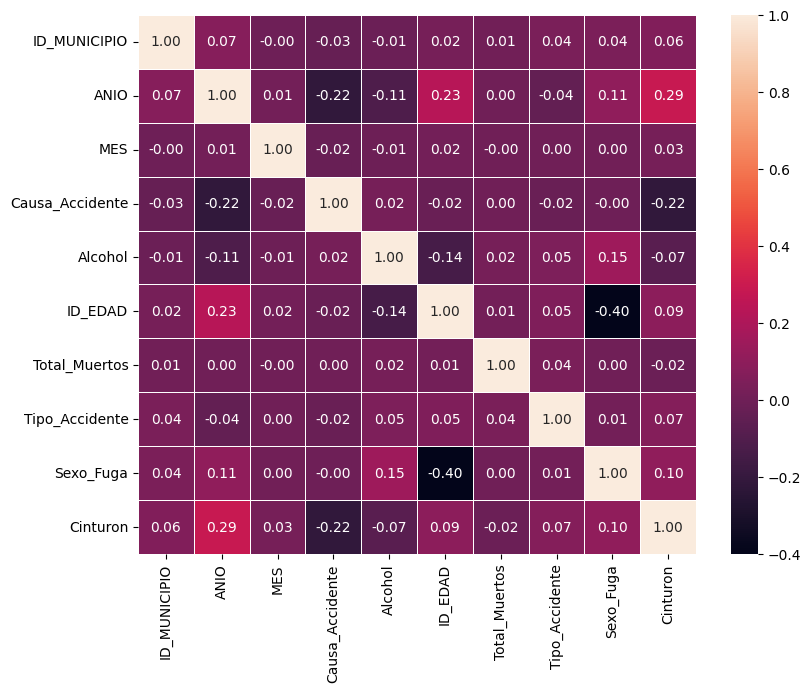

In [14]:
# Correlation matrix 
# df_Sonora_Tidy = df_Sonora_Complete.copy()
df_Sonora_Tidy = df_Sonora_Complete.copy()
# One Hot Encoding for "Causa Accidente"
label_encoder = LabelEncoder()
df_Sonora_Tidy["Causa_Accidente"] = label_encoder.fit_transform(df_Sonora_Tidy["CAUSAACCI"])
df_Sonora_Tidy["Alcohol"] = label_encoder.fit_transform(df_Sonora_Tidy["ALIENTO"])
df_Sonora_Tidy["Tipo_Accidente"] = label_encoder.fit_transform(df_Sonora_Tidy["TIPACCID"])
df_Sonora_Tidy["Sexo_Fuga"] = label_encoder.fit_transform(df_Sonora_Tidy["SEXO"])
df_Sonora_Tidy["Cinturon"] = label_encoder.fit_transform(df_Sonora_Tidy["CINTURON"])

df_Sonora_Tidy = df_Sonora_Tidy[["ID_MUNICIPIO","ANIO","MES","Causa_Accidente","Alcohol", "ID_EDAD", "Total_Muertos", "Tipo_Accidente", "Sexo_Fuga", "Cinturon"]]

plt.figure(figsize=(9,7))
sn.heatmap(df_Sonora_Tidy.corr(), annot=True, linewidth=.5, fmt=".2f")
plt.show()

### Resultados - Correlacion

Una vez analizado a traves de un diagrama de pearson, encontré algunas relaciones interesantes, entonces procederé a realziar un analisis rapido de las variables relacionadas.
- Año
    - Edad
    - Cinturon
    - Causa Accidente
    - Alchol
- Edad
    - Sexo_Fuga
    - Alcohol
- Alchol
    - Sexo


<center>
    <h1> Graficas<h1>
    <hr>
</center>

### Correlaciones con la variable año

Text(0.5, 1.0, 'Accidentes de Trnasito por EDAD en Sonora')

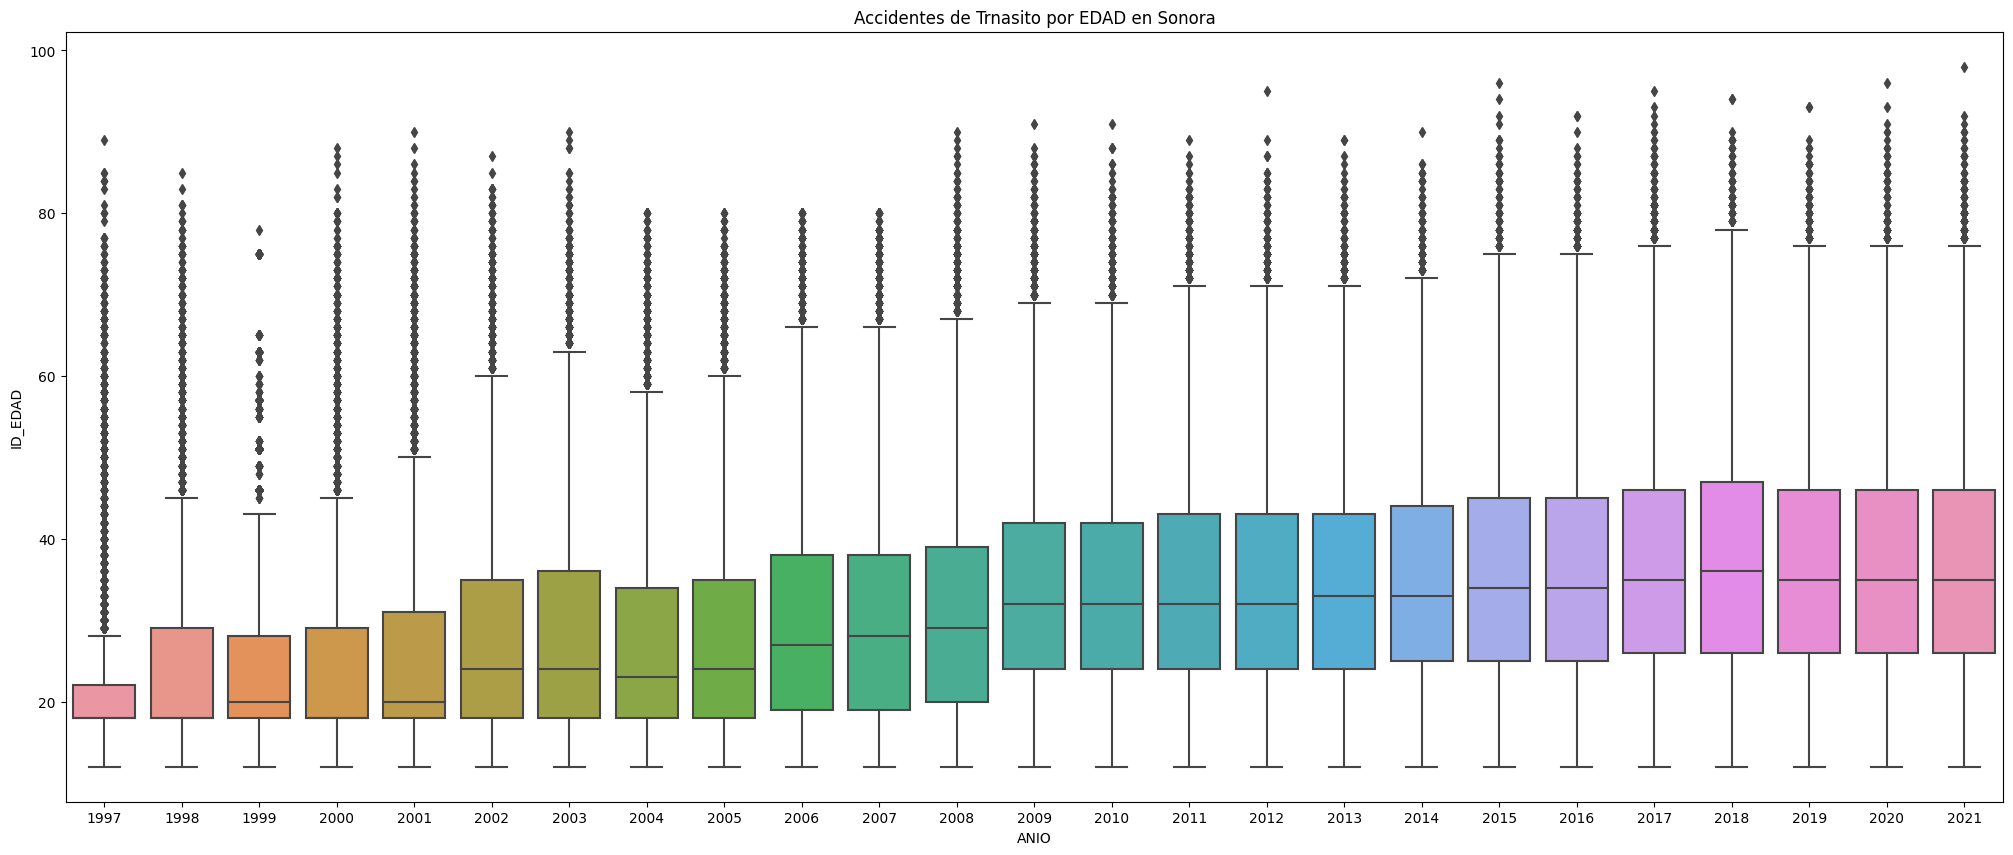

In [33]:
# Removemos los valores de 0 y 99 del año
# 0 = Se fugo, 99 = Se ignora/Desconoce la edad
df_Sonora_Edad_vs_Anio = df_Sonora[(df_Sonora.ID_EDAD != 0) & (df_Sonora.ID_EDAD != 99)]
plt.figure(figsize=(25,10))
ax = sns.boxplot(x="ANIO", y ="ID_EDAD", data = df_Sonora_Edad_vs_Anio)
plt.title("EDAD conductores en Accidentes de transito - Sonora")

In [ ]:
# Crear tabla de responsabilidad

# df_temp1 = df_Sonora[df_Sonora["ID_EDAD"] != 0].groupby("ANIO").agg({
#     "ID_EDAD" : "count"    
# })
# plt.figure(figsize=(20,10))
# ax = sns.barplot(x=df_temp1.index, y =df_temp1.ID_EDAD)
# plt.title("Accidentes de Trnasito por EDAD y con aliento Alcholico en Sonora")
# len(df_Sonora[df_Sonora["ID_EDAD"] == 0].index)
# len(df_Sonora[df_Sonora["SEXO"] == "Se fugó"].index)
# len(df_Sonora[(df_Sonora["ID_EDAD"] == 0) & (df_Sonora["SEXO"] == "Se fugó")].index)
# len(df_Sonora.index)
df_Sonora

Text(0.5, 1.0, 'EDAD conductores con aliento Alcholico en Accidentes de Transito - Sonora ')

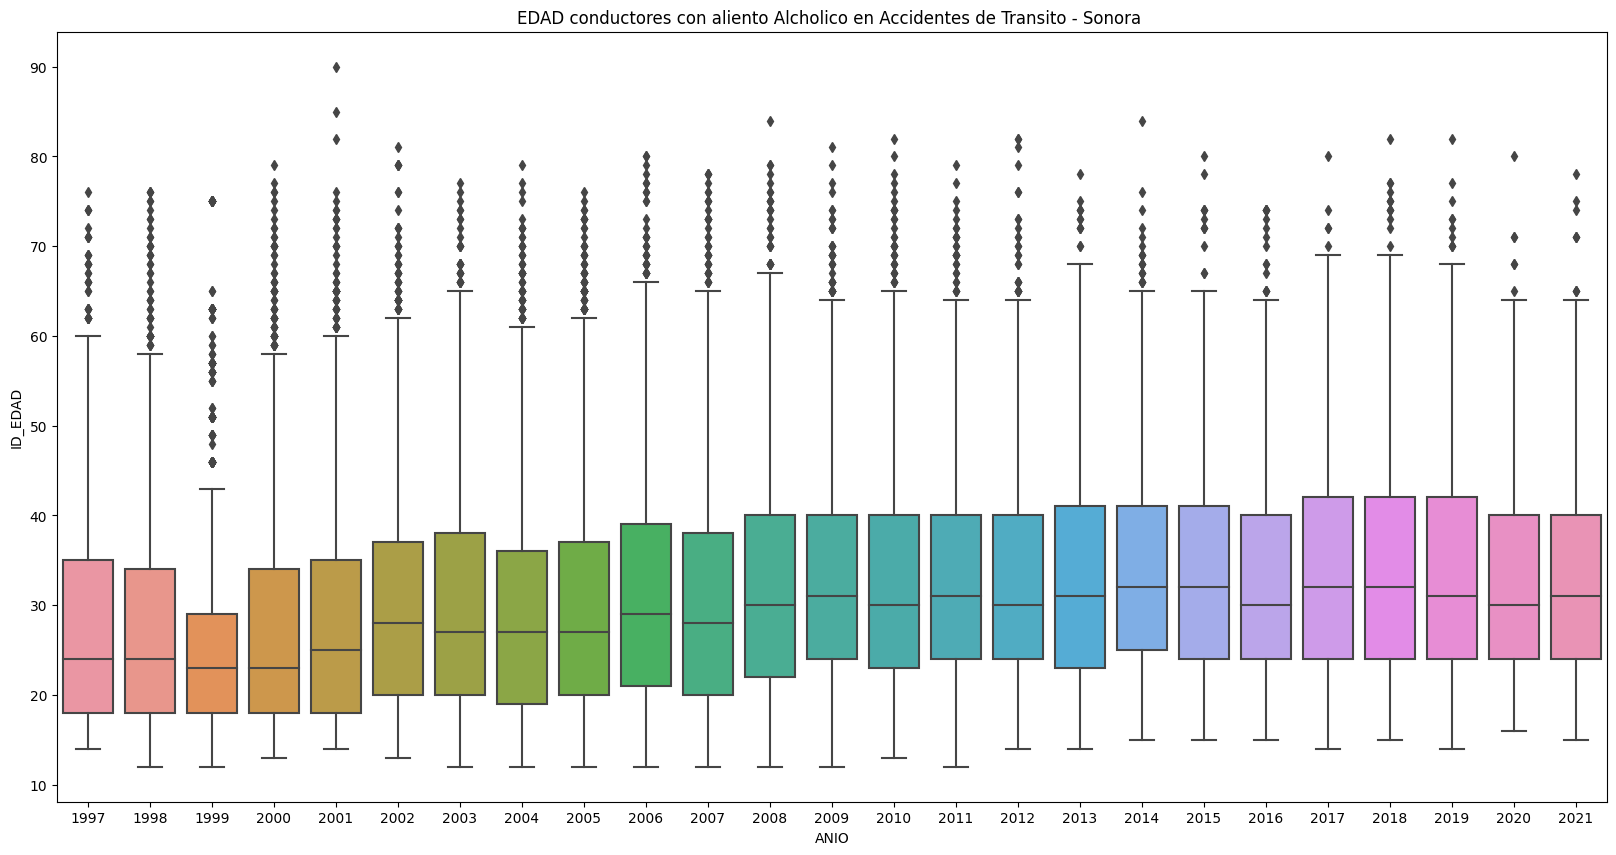

In [71]:
# Removemos los valores de 0 y 99 del año
# 0 = Se fugo, 99 = Se ignora/Desconoce la edad
df_Sonora_Edad_vs_Anio = df_Sonora[(df_Sonora.ID_EDAD != 0) & (df_Sonora.ID_EDAD != 99) & (df_Sonora["ALIENTO"] == "Sí")]
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="ANIO", y ="ID_EDAD", data = df_Sonora_Edad_vs_Anio)
plt.title("EDAD conductores con aliento Alcholico en Accidentes de Transito - Sonora ")

Text(0.5, 1.0, 'Edades de conductores con aliento Alcholico en accidentes con al menos 1 persona muerta - Sonora')

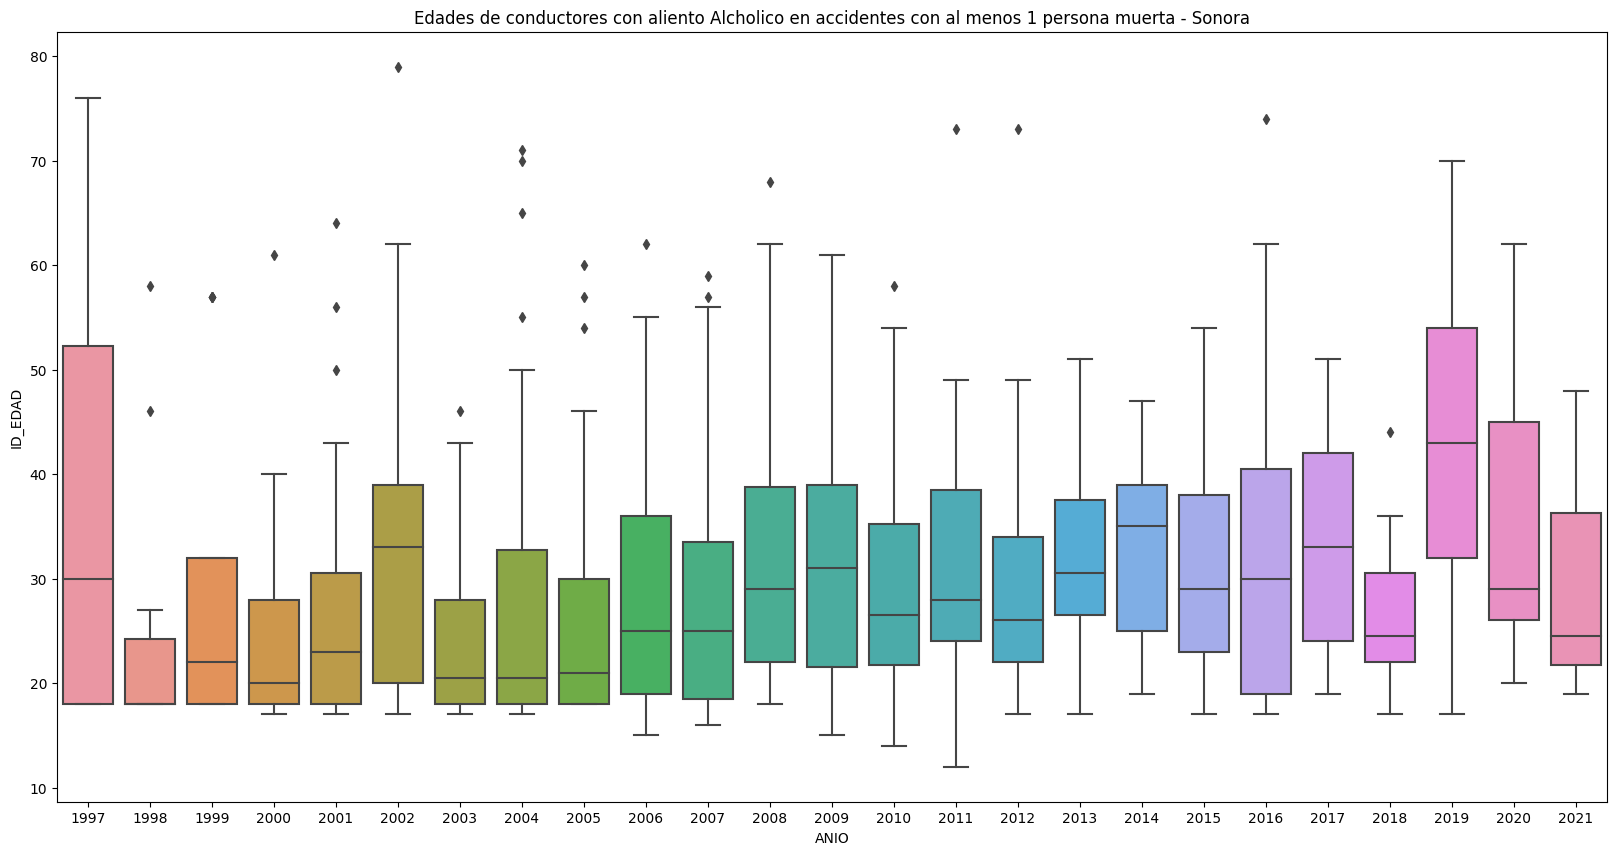

In [72]:
# Remove 0  and 99 from the data
df_Sonora_Edad_vs_Anio = df_Sonora[(df_Sonora.ID_EDAD != 0) & (df_Sonora.ID_EDAD != 99) & (df_Sonora["ALIENTO"] == "Sí") & (df_Sonora["Total_Muertos"] >= 1)]
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="ANIO", y ="ID_EDAD", data = df_Sonora_Edad_vs_Anio)
plt.title("Edades de conductores con aliento Alcholico en accidentes con al menos 1 persona muerta - Sonora")

Text(0.5, 1.0, 'Causa accidentes de Transito por año en Sonora')

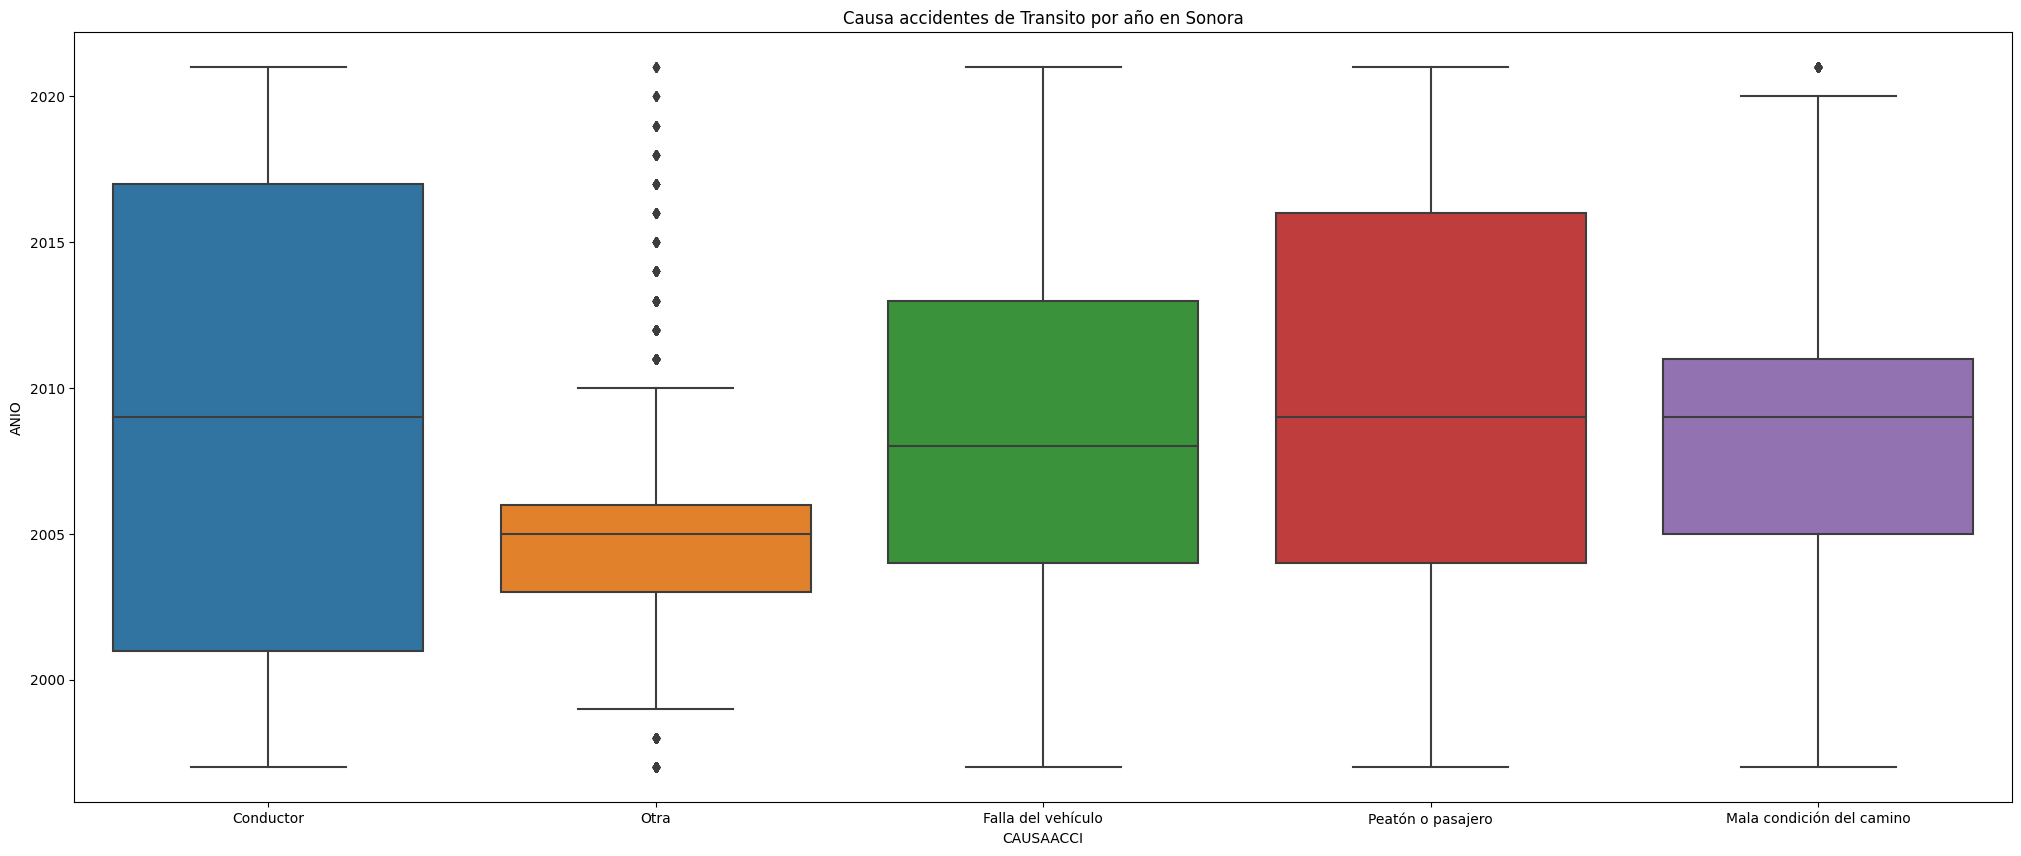

In [73]:
plt.figure(figsize=(25,10))
ax = sns.boxplot(x="CAUSAACCI", y ="ANIO", data = df_Sonora[(df_Sonora.ID_EDAD != 0) & (df_Sonora.ID_EDAD != 99)])
plt.title("Causa accidentes de Transito por año en Sonora")

### Relacion con variables EDAD

Text(0.5, 1.0, 'Edades de conductores con aliento Alcholico en accidentes con al menos 1 persona muerta - Sonora')

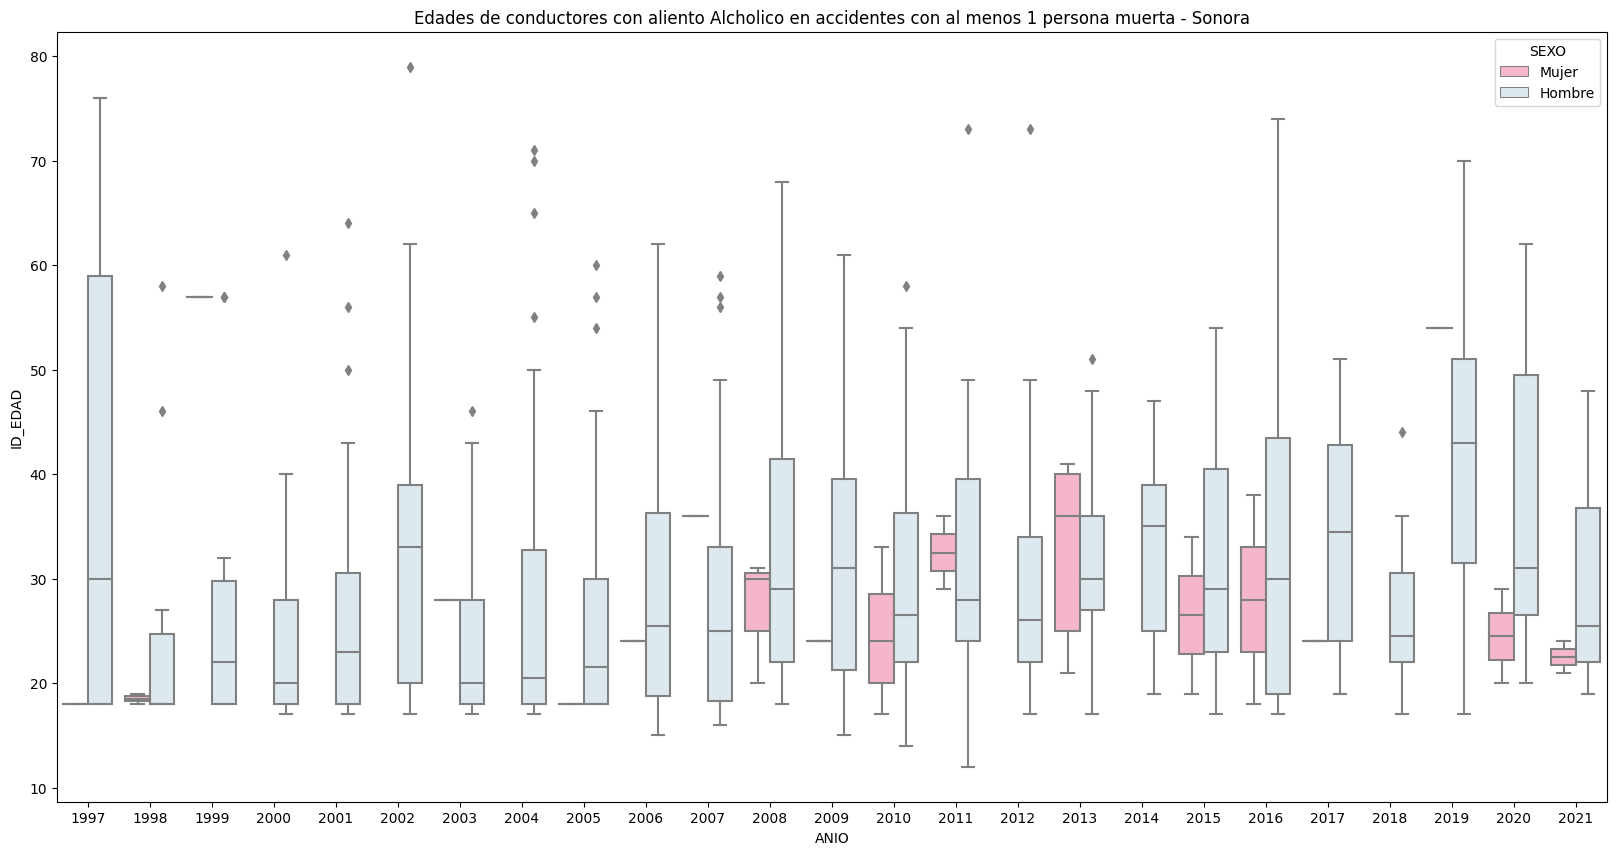

In [21]:
df_Sonora_filtred = df_Sonora[(df_Sonora.ID_EDAD != 0) & (df_Sonora.ID_EDAD != 99) & (df_Sonora["ALIENTO"] == "Sí") & (df_Sonora["Total_Muertos"] >= 1)]
# df_Sonora_filtred = df_Sonora[(df_Sonora.ID_EDAD != 0) & (df_Sonora.ID_EDAD != 99)]
palette ={"Hombre": "#DAEAF1", "Mujer": "#FFACC7"}
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="ANIO", y ="ID_EDAD", data = df_Sonora_filtred, hue="SEXO", palette=palette)
plt.title("Edades de conductores con aliento Alcholico en accidentes con al menos 1 persona muerta - Sonora")

### Tasas

In [16]:
fig = px.line(df_Sonora_Tasa_Muertes_Al, x="Years", y="Tasa_Muertos_Alcohol", color="Nombre_Municipio", markers="True",
title="Tasa > 1 de Muertos en accidentes con conductor alcoholizado (por cada 1000 Habitantes) ")
fig.show()

Vamos a analizar la distribucion de los datos con personas alcolizadas

In [43]:
fig = px.histogram(df_Sonora[df_Sonora["MES"] == 12], x="ANIO", title="Total de accidentes vehiculares en diciembre - Sonora")
fig.show()

In [17]:
# fig = px.histogram(df_Sonora[df_Sonora["ALIENTO"] == "Sí"], x="ID_HORA", title="Horas donde ocurren mas accidentes con conductor alcholizado")
fig = px.histogram(df_Sonora[df_Sonora["MES"] == 12], x="ID_HORA", title="Horas donde ocurren mas accidentes con conductor alcholizado")
fig.show()

In [ ]:
df_Sonora
fig = px.histogram(df_Sonora, x="ID_DIA", title="Tipos Accidentes")
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_Municipio_Deaths.Years,
    y=df_Municipio_Deaths.Total_Deaths,
    marker_color='lightsalmon'
))
# fig.add_trace(go.Bar(
#     x=df_temp3.head(8).index,
#     y=df_temp1.Total_Muertos_Alcohol,
#     name='Total Muertos Alcohol',
#     marker_color='indianred'
# ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-80, title="Muertes por año en Sonora, con Alcohol y Otras causas")
fig.show()